<h1 style="text-align:center; font-size: 30px;"> Procedural Generation</h1>
<br>

<p style="text-align:center; font-size: 16px;"><i>The artistry of programming lies in the fusion of creativity, problem-solving, and expression,<br>thereby providing a philosophical reflection of the human mind's capacity to create and shape the world around us.</i></p>
<br>

---

<br>
<br>
<br>

<div style="display: flex; justify-content: center;">
    <figure>
        <img src="img/v5_upscale.png" width="300">
        <figcaption>
            <p style="text-align:center; font-size: 16px;">
            <strong><a href="https://www.midjourney.com/">Midjourney</a></strong> by <i>V5_upscale</i>
        </figcaption>
    </figure>
    <div style="margin-left: 50px;">
        <figure >
            <img src="img/pg_unity.jpg" width="500">
            <figcaption>
                <p style="text-align:center; font-size: 16px;">
                <strong><a href="https://unity.com/">Unity</a> Example:</strong> <i>Procedural Generated Terrain</i>
            </figcaption>
        </figure> 
        <figure style="margin-top: 20px;">
            <img src="img/townscaper.png" width="300">
            <figcaption>
                <p style="text-align:center; font-size: 16px;">
                <strong>
                    <a href="https://oskarstalberg.com/Townscaper/">Townscaper</a> Example:
                </strong> <i>Wave Function Collapse</i>
                </p>
            </figcaption>
        </figure>
    </div>
</div>

<br>
<br>

---

There are many ways to create an artificial world. Such as writing it down on paper, drawing it or by the pure excellence of Math. Since the emergence of AI-generated art and its ascent to the highest ranks of digital representation, the masses have become aware of the importance of digital worlds in our lives.

But even before elaborately trained computer models were developed, there were artists who designed digital worlds. Larger than any human being could imagine. Therefore, I would like to take you on a journey into the world of algorithms.

---

But what is _Procedural Generation_?

Procedural generation is a technique in computer graphics and computer game development that enables the automatic creation of content using algorithms.

Unlike manual content creation by developers, procedural generation allows content to be generated in a dynamic and algorithmic way, based on rules, randomness, or other mathematical methods. This can be used, for example, to generate landscapes, buildings, weapons, characters, levels, or entire worlds.

It is used in various applications such as video games, movies, simulations, architecture, music, and art to increase efficiency and versatility in content creation, while creating a unique and ever-changing experience for the user.

The modern game designer should be familiar with 3 methods for generating procedural worlds:

- The Black Box of AI Generated Worlds <br>Demo: [Midjourney](https://www.midjourney.com/), [Nvidia Canvas](https://www.nvidia.com/en-us/studio/canvas/)

- Wave Function Collapse by Oskar Stalberg <br>Demo: [Townscaper](https://oskarstalberg.com/Townscaper/)

- Perlin Noise Composition / Fields by Ken Perlin

---

Steigen wir ein in Medias Res

Um zu verstehen wie wir Terrain erschaffen können probieren wir einfach ein paar Funktionen aus.

- Random PCG
- Sine / Cosine
- Random Sine
- Perlin Noise
- Perlin Noise Composition https://gamedevacademy.org/procedural-2d-maps-unity-tutorial/
https://web.archive.org/web/20170812230846/http://www.gameprogrammer.com/fractal.html
https://devforum.roblox.com/t/dungeon-generation-a-procedural-generation-guide/342413/11

Wichtig wir nutzen x & y als Map normale und z als höhenwert das ist in Game Engines anders.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from perlin_noise import PerlinNoise
import random
from itertools import chain
import operator as op

In [2]:
def plot3D_terrain(pic, cmap='viridis'):
    '''
    Function interprets extends a xy-plain in the z-plane,
    by reinterpreting pixel values as height information.
    '''
    
    X = np.linspace(-width/2, width/2, width)
    Y = np.linspace(-height/3, height*2/3, height)
    
    X, Y = np.meshgrid(X, Y)
    Z = np.interp(np.array(pic), [-1, 0, 1], [-64, 0, 256])
    
    ax = plt.axes(projection='3d')
    ax.set_zlim(-64, 256)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap, edgecolor='none')
    
    
def plot2D_picture(pic, cmap='gray'):
    '''
    Just a usual image plot
    '''
    plt.imshow(pic, cmap=cmap)
    plt.show()

def plot_scatter(f, space):
    '''
    Just a scatter plot...
    '''
    plt.scatter(space, f)
    plt.show()

def plot_line_scatter(f, space):
    '''
    plots the same function overlapping as a scatter and a line plot
    '''
    plt.scatter(space, f, color='blue')
    plt.plot(space, f, color='green')
    plt.show()

def plot_rel_sin(f, space):
    '''
    plot the input function relativ to normal sin(x)
    '''
    plt.scatter(space, f, color='blue')
    plt.plot(space, np.sin(space), color='red')
    plt.axhline(y = 0, color = 'gray', linestyle = ':')
    plt.show()

In [3]:
# Constants
width, height = 16, 16
np.random.seed(width*height) # define seed by width & height constants

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    // JS Magic bitch!
    return false;
}

<IPython.core.display.Javascript object>

## A word about Randomness

Randomness has many definitions. But what exactly is randomness? Rolling a dice, for example, is not random. Any roll of the dice can be predicted, provided all the necessary data is available. Weather is not random either. All events can be predicted if there is enough data, the only problem is that there is never enough data. 

Every other example can be disproved as "random" with the same argumentation. Therefore, these phenomena are called pseudo-random. 

But this aside for the moment. There is a phenomenon in physics which is completely unpredictable. If a single photon is shot at a semi-transparent mirror, it can __never__ be predicted on which of the two detectors the photon will hit. This form of really true coincidence is used by the company (ID Quntique) [https://www.idquantique.com/random-number-generation/overview/] and sells devices which use the previously explained quantum phenomenon.

But enough about the true coincidence and back to the pseudo-randomness and how computers treat this.

## Pseudo Randomness

Zufallszahlen in Computern werden über Formeln berechnet. Einer dieser Generatoren ist der _Linear Congruent Generator (LCG)_, dessen mathematische Grundlage leicht verdaulich ist.

$$ X_{n+1} = (aX_n + c) \;mod\; m; \quad n \geq 0 $$

Wenn $ c = 0 $ dann nennt man den Generator auch _Multiplicative Congruent Generator (MCG)_.

Die Werte haben folgenden nutzen in der Funktion:

- $X_n$ ist der Startwert oder seed
- $X_{n+1}$ ist der folgewert der im nächsten schritt für $X_n$ eingesetzt wird
- $a$ ist der Vorfaktor vom Startwert dieser wird skaliert, deshalb wird er skalar gennant
- $c$ ist das hinzuaddierte Offset
- $m$ ist der Restklassenring oder auch Modulus gennant

## Aufgabe

Schreibe einen _Linear Congruent Generator_ mit dem funktionsnamen lcg. 

## Aufgabe

Nutze die vorher geschriebene LCG Funktion, um eine weitere Funktion zu schreiben. die einen MCG korrekt implementiert.

## Aufgabe

Baue den lcg zu einem Genrator um. Das Python Wiki stellt dafür eine Einführung vor (Generators)[https://wiki.python.org/moin/Generators].

Mit der Python Generator Syntax lässt sich ein vernünftig zu verwendender LCG implementieren.

In [5]:
def lcg(seed: int, scalar: int, modulus: int, offset: int) -> int:
    ''' 
    Linear Congruential Generators

    X(n+1) = (a X(n) + c) mod m; n >= 0

    m > 0; 
    0 <= a < m;
    c > 0; a > 0

    '''
    assert modulus > 0, "Modulus must be greater than 0"
    assert 0 <= scalar and scalar < modulus, "Scalar must be in range 0 <= a < m"

    while seed > 1:
        seed = (scalar*seed+offset) % modulus
        assert seed >= 0
        yield seed

def mcg(seed: int, scalar: int, modulus: int) -> int:
    '''
    Multiplicative Congruential Generator
    or Lehmer Generator

    Just the same as lcg with the Property c=0 & a>0
    '''
    return lcg(seed=seed, scalar=scalar, modulus=modulus, offset=0)

Mit den magischen Werten 

- seed = $3935559000370003845$
- scalar = $3203021881815356449$
- modulus = $2^{64}-1$
- offset = $11742185885288659963$

lässt sich folgende Zufallsfolge erzeugen:

In [6]:
gen = lcg(3935559000370003845, 3203021881815356449, 2**64-1, 11742185885288659963)

for i in range(1, 10):
    print("{}.".format(i), next(gen))

1. 3089810780120156248
2. 8356396685252565260
3. 1921117399837525548
4. 14806858147081821235
5. 2557599628047639428
6. 16453652254840064460
7. 15995401842808378843
8. 681272290641816305
9. 10955466795170118648


Nutzt man kleinere Werte (die ersten 4 Primzahlen), wiederholt sich der LCG nicht mehr:

In [7]:
gen = lcg(3, 5, 7, 2)

for _ in range(10):
    #try:
    print(next(gen))
  #  except:
   #     continue

3
3
3
3
3
3
3
3
3
3


## Aufgabe

Basteln wir im nächsten Schritt daraus einen QR Code. Die zur Verfügung gestellte Funktion _plot2D_picture_ erwartet ein 2-Dimensionales Array aus Zahlen.
Nutze zur Dimensionierung des Arrays die Werte _width_ & _height_, diese sind Standardmässig auf 16 gestellt.

Das Bild sollte aus den Zufallswerten des LCG bestehen.

Nutze dafür folgende Werte:

- seed = $3935559000370003845$
- scalar = $3203021881815356449$
- modulus = $2^{64}-1$
- offset = $11742185885288659963$

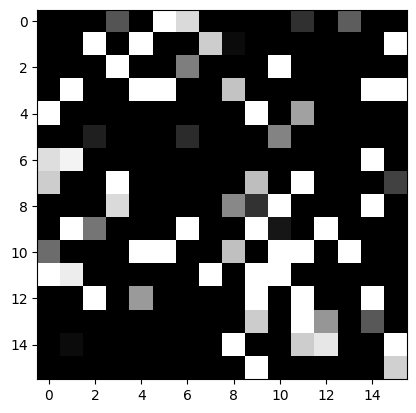

In [8]:
gen = lcg(3935559000370003845, 3203021881815356449, 2**64-1, 11742185885288659963)
pic = [[next(gen) for x in range(width)] for y in range(height)]

# Just a Linear Interpolation Trick
ncol = len(pic[0])
flattened = chain.from_iterable(pic)
max_idx, max_val = max(enumerate(flattened), key=op.itemgetter(1))
row = max_idx // ncol
col = max_idx % ncol
pic = np.interp(np.array(pic), [pic[row][0], pic[col][0]], [-64, 256])

plot2D_picture(pic)

## Aufgabe

Um nun aus dem Bild ein Terrain zu generieren nutze die Funktion _plot3D_terrain_ diese nimmt ein 2-Dimensionales Bild entgegen.

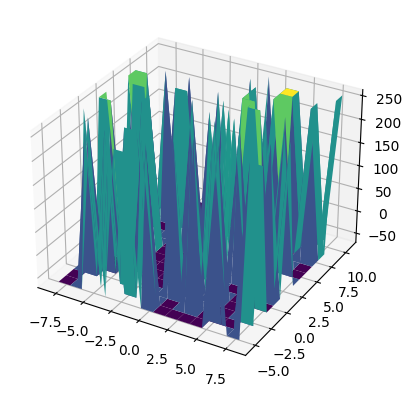

In [9]:
plot3D_terrain(pic)

---

## A Family of Better Random Number Generators

<div style="display: flex; justify-content: center;">
    <figure style="margin-top: 30px;">
        <img src="img/melissa_o_neill.jpg" width="300">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Melissa E. O’Neill</strong>
            </p>
        </figcaption>
    </figure>
    <div style="margin-left: 40px; max-width: 60%; word-wrap:break-word;">
        <br/>
            <p><i>Linear Congruent Generators</i> zeichnen sich durch ihre Stabilität und Geschwindigkeit als Hervorragende Zufallsgeneratoren. Doch 2014 gelang Melissa E. O'Neil ein neuer durchbruch in der Konzeption von Pseudozufallsgeneratoren. Das Problem mit existierenden Zufallsgeneratoren ist entweder ihre Stabilität (Wie vorhersehbar die Zufallszahlen sind) oder ihrer Geschwindigkeit (Wie lange der Zufallsgenerator braucht um die nächste Zufallszahl zu errechnen).</p>
            <p>Ihr Durchbruch gelang indem Sie die Vorteile eines <i>Linear Congruent Generators</i> mit dem eines <i>XorShift Generators</i> verband. Dadurch erreichte Sie nicht nur eine Normalverteilung in den generierten Zufallszahlen (und eine damit einhergende Stabilität), Sie hatte auch eine Family von schnellen einfachen Algorithmen entwickeln. Diese nennen sich <i>PCG Permuted Congruential Generator</i>.</p>
            <p>Die Implementierungsdetails lassen wir im nächsten Schritt aus, da diese sich nicht einfach in Python umzusetzen sind. Auf der Webseite <a href="https://www.pcg-random.org" >pcg-random.org</a> lassen sich implemtierungen für C & C++ finden. Als weiterführende Literatur ist <a href="https://www.pcg-random.org/pdf/hmc-cs-2014-0905.pdf" >PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation - Melissa E. O’Neill</a> als Literatur angegeben.</p>
    </div>
</div>

Zum Glück hat _Numpy_ eine Implementierung des _PCG_. Diese findet sich unter (Numpy PCG64)[https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html]

## Aufgabe

Schau dir im folgenden die Dokumentation zu (Numpy PCG64)[https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html].

Schreibe einen kleinen Kommentar darüber welchen Output folgende Funktionen generieren:

In [10]:
from numpy.random import Generator, PCG64, SeedSequence

def pcg64(seed=2**5-1, seq=100):
    sg = SeedSequence(seed)
    n = seq//10
    rg = [Generator(PCG64(s)) for s in sg.spawn(n)]

    while 1:
        for i in range(n):
            gen = rg[i]
            yield gen.random()

def pcg64_gen(seed=2**5-1, seq=100):
    gen = pcg64(seed, seq)
    for _ in range(seq):
        yield next(gen)

## Aufgabe

Erstelle nun ein 2-Dimensionales Array und erzeuge damit ein bild.

Nutze dafür den Seed _seed = 65³-1_

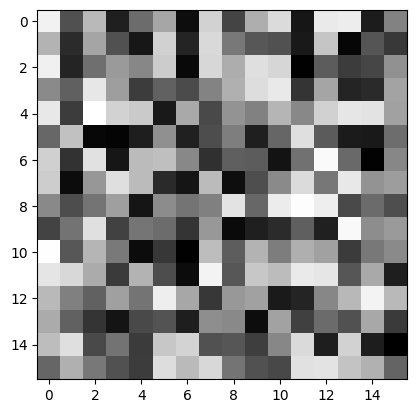

In [11]:
pic = [[rand for rand in pcg64_gen(y, width)] for y in range(height)] # To Do make it 2D'

plot2D_picture(pic)

## Aufgabe

plotte das Terrain aus dem Vorheriger Aufgabe

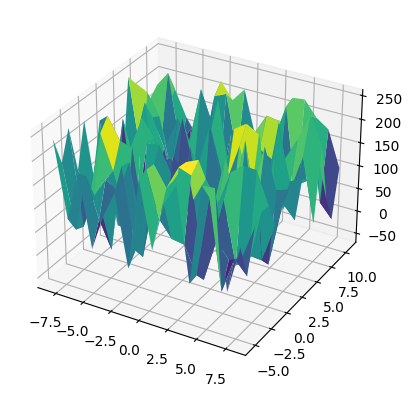

In [12]:
plot3D_terrain(pic)

Aus diesem terrain sieht man bereits, dass die uniformierte Verteilung an Zufallszahlen bereits zu einem besser Sichtbaren Terrain führt.


---

# Smoothing Functions 

Das Problem aus voherigem Abschnitt zu lösen, müssen wir das Terrain smoothen. Was bedeutet das die Zufallszahlen smoother sein müssen.

Dies erreicht man mit Trigonomertrischen Funktionen insbesondere mit dem Sinus & Cosinus. Da der Cosinus sich vom Sinus nur um eine Verschiebung von $\phi + \frac{\pi}{2}$ unterscheidet

$$\cos(\phi) = \sin(\phi + \frac{\pi}{2})$$

bzw.

$$\sin(\phi) = \cos(\phi - \frac{\pi}{2})$$

beschränken wir nachfolgende Rechnungen komplett auf den Sinus.

Dieser sieht wie folgt aus:

- Sinus plotten
- Sinus Terrain

- kombination mit Zufallszahlen
- Plot 1D
- Terrain

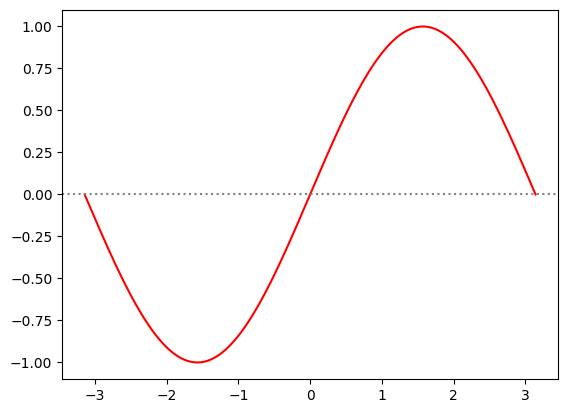

In [13]:
space = np.linspace(-np.pi, np.pi, width*height)

plt.plot(space, np.sin(space), color='red')
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.show()

Daraus lässt sich wiederrum ein periodisch wiederholendes Terrain basteln, indem die Sinuswerte der x & y Werte miteinander addiert werden:

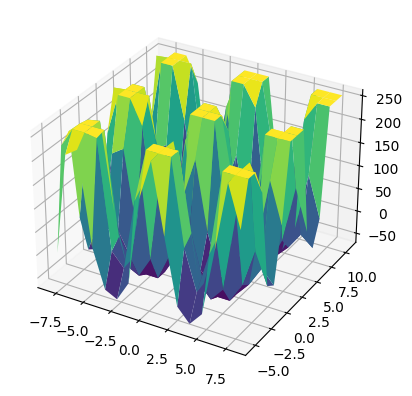

In [14]:
sint = [[np.sin(x)+np.sin(y) for x in range(width)] for y in range(height)]

plot3D_terrain(sint)

Aus dieser Figur lässt sich schon erkennen, wie man Terrain im allgemeinen Smoother macht.

Der nächste Schritt wäre den Zufall mit einzubauen. Eine richtige Berglandschaft besteht nicht ausschließlich aus uniform periodisch angeordneten Tälern.

Die einfachste Möglichkeit wäre die Werte aus dem Zufallsgenerator als Eingabe für den Sinus zu verwenden. Wichtig ist hierbei nur, dass der PCG ausschließlich positive Werte aus dem offenem Intervall (0,1) erzeugt, während der Sinus eine Funktion ist die $[0, 2\pi] \mapsto [-1, 1]$ mappt. Daher folgt $f(x,y) = -1^y\cdot\sin(PCG64(x)) $

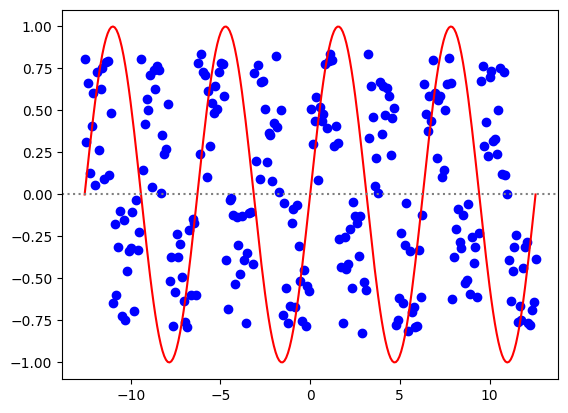

In [25]:
T = 4
space = np.linspace(T*-np.pi, T*np.pi, width*height)
f = lambda x,y: np.sin(x)*(-1)**y # just the definition x is substituted externaly
pic = [[f(x,y) for x in pcg64_gen(y, width)] for y in range(height)]

plot_rel_sin(pic, space)

Das daraus Resultierende Terrain verreint dementsprechend die Beiden Eigenschaften der Zufallsverteilung und die der periodischen Wiederholung

Dennoch sieht es nicht gerade schön aus:

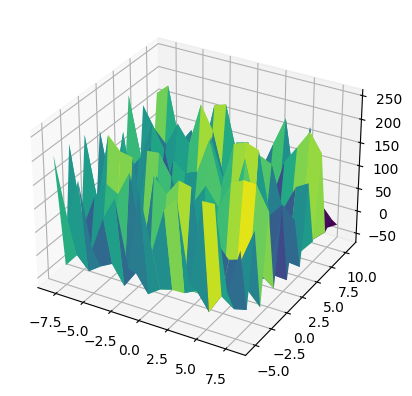

In [27]:
plot3D_terrain(pic)

---

# Anmerkungen

jede andere Funktion lässt sich auch zum smoothen verwenden. Hierzu sollte die Funktion gegebenenfalls beschränkt werden.

besonderns gut sind

- Gaußsche Normalverteilung $$f(x) = \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
- Sigmoid $$f(x) = \frac{1}{1+\exp(-x)}$$
- Absolut Werte $$f(x) = \left| x \right|$$
- ZickZack Funktion $$f(x) = 1 - \frac{2}{\pi}\cdot\arccos(\cos(x))$$

## Gaußsche Normalverteilung

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Mit der Gaußschen Normalverteilung lässt sich ein extrem realistischer Hügel erzeugen

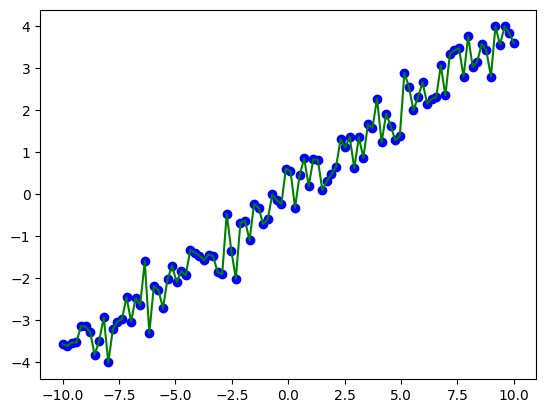

In [28]:
# Random Sine Wave Distribution
T = 10
x = np.linspace(-T, T, T**2)
f = lambda x: np.interp(np.random.normal(x), [-T, 0, T], [-1, 0, 1])

plot_line_scatter(f(x)*4, x)

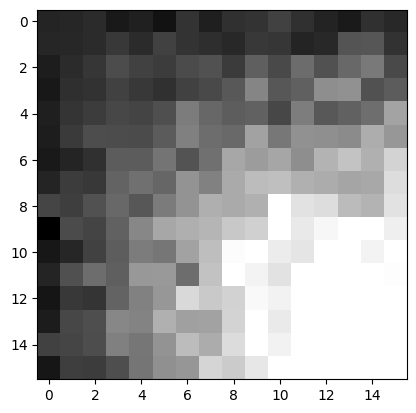

In [29]:
# Random 2D Image
pic = [[f(x)*f(y) for x in range(width)] for y in range(height)]
plot2D_picture(pic)

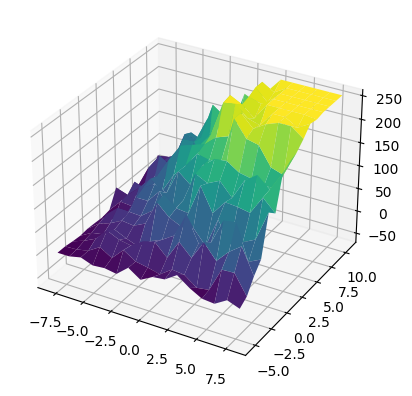

In [30]:
# Random Terrain
plot3D_terrain(pic)

## Sigmoid

$$f(x) = \frac{1}{1+\exp(-x)}$$

Erzeugt sehr glatte Stufen. Vorsichtig der Interessante Bereich ist von $ \mathbb{R} \mapsto (0, 1) $

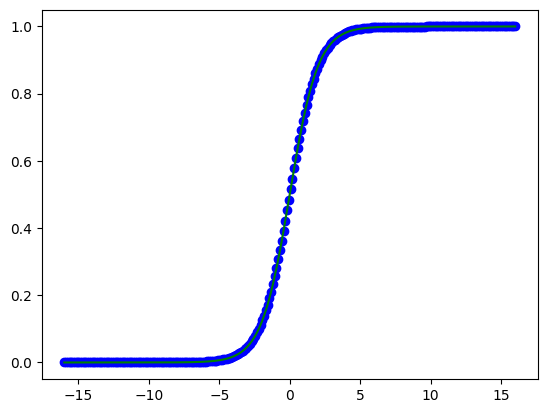

In [34]:
sigmoid = lambda x: 1/(1+np.exp(-x)) # Numerical unstable

space = np.linspace(-width, width, width**2)
f = sigmoid(space)

plot_line_scatter(f, space)

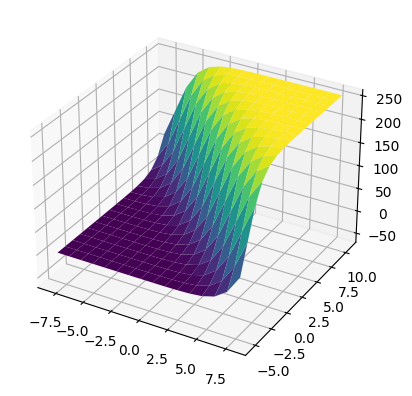

In [44]:
pic = [[sigmoid(y+x) for x in range(-width//2, width//2)] for y in range(-height//2, height//2)]

plot3D_terrain(pic)

## Absolut Werte

$$f(x) = \left| x \right|$$

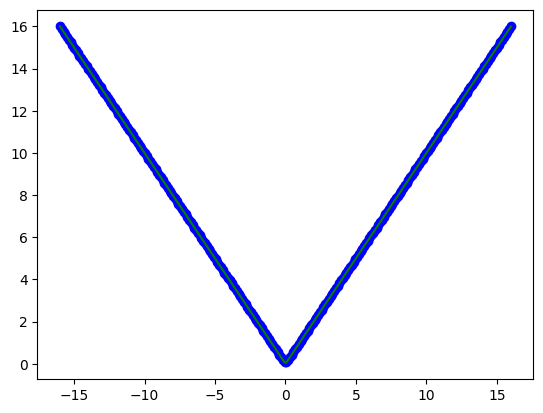

In [45]:
space = np.linspace(-width, width, width**2)
f = np.abs(space)

plot_line_scatter(f, space)

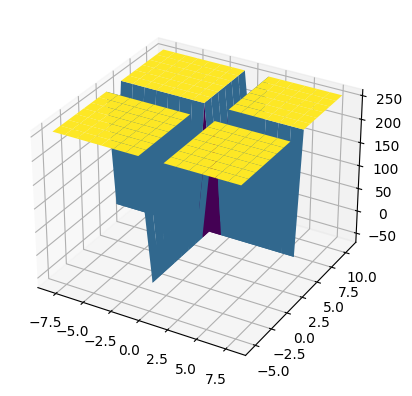

In [50]:
pic = [[np.abs(x*y) for x in range(-width//2, width//2)] for y in range(-height//2, height//2)]

plot3D_terrain(pic)

## ZickZack 

$$f(x) = 1 - \frac{2}{\pi}\cdot\arccos(\cos(x))$$

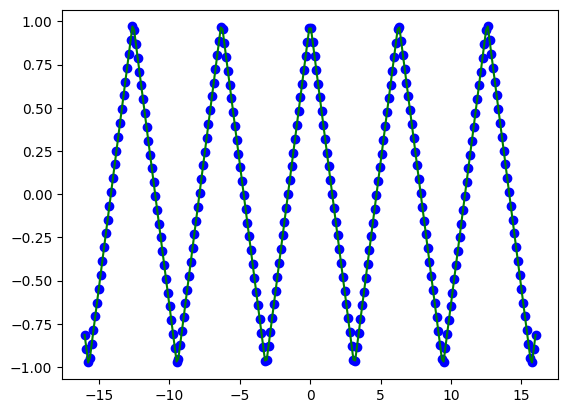

In [51]:
zick_zack = lambda x: 1-(2/np.pi)*np.arccos(np.cos(x))
space = np.linspace(-width, width, width**2)
f = zick_zack(space)

plot_line_scatter(f, space)

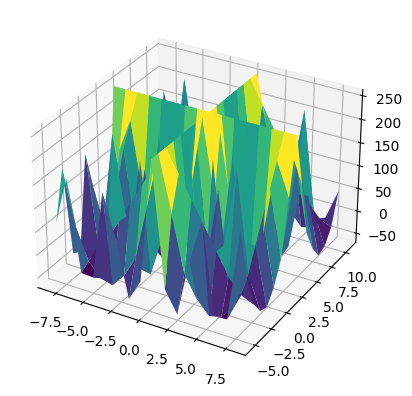

In [62]:
pic = [[zick_zack(x*y) for x in range(-width//2, width//2)] for y in range(-height//2, height//2)]

plot3D_terrain(pic)

---

# Perlin Noise

The year is 1982 and programmer Kevin Flynn is trying to find proof that several games he developed were stolen by Ed Dillinger to secure his position as CEO of ENCOM.

The introduction to the movie Tron can be explained in a similar way. But helping in the production of the film was __Kennneth (Ken) H. Perlin__, now a professor of computer science. His algorithm _Perlin Noise_ even brought him an Oscar in 1997. He used it to develop "realistic textures" for the film Tron. 
<div style="display: flex; justify-content: center;">
    <figure style="margin-top: 30px;">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Tron (1982)</strong>
            </p>
        </figcaption>
        <img src="img/tron.jpg" width="600">
    </figure>
    <figure style="margin-top: 30px; margin-left: 50px;">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Ken Perlin</strong>
            </p>
        </figcaption>
        <img src="img/ken-perlin.jpg" width="305">
    </figure>
</div>

 ## Perlin Noise Flow Fields
 
 <div style="display: flex; justify-content: left; width: 75%">
 <figure style="margin-top: 90px;">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Interactive Perlin Noise Field</strong>
            </p>
        </figcaption>
        <iframe src="https://davenewt.github.io/p5-perlin-noise/" title="Interactive Perlin Noise Field" height=500 width="120%"></iframe>
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>by Davenewt</strong>
            </p>
        </figcaption>
    </figure>
 </div>

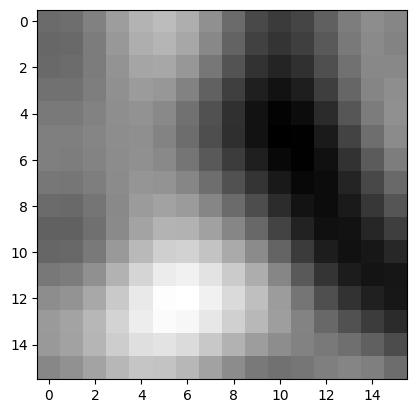

In [22]:
# Perlin Noise 2D
o = 1
noise1 = PerlinNoise(octaves=2*o, seed=width*height)
noise2 = PerlinNoise(octaves=2*o, seed=width*height)
noise3 = PerlinNoise(octaves=2*o, seed=width*height)
noise4 = PerlinNoise(octaves=2*o, seed=width*height)

pic = []
for y in range(height):
    row = []
    for x in range(width):
        noise_val = noise1([x/width, y/height])
        noise_val += 0.5 * noise2([x/width, y/height])
        noise_val += 0.25 * noise3([x/width, y/height])
        noise_val += 0.125 * noise4([x/width, y/height])
        row.append(noise_val)
    pic.append(row)

pic = np.array(pic)
plot2D_picture(pic)

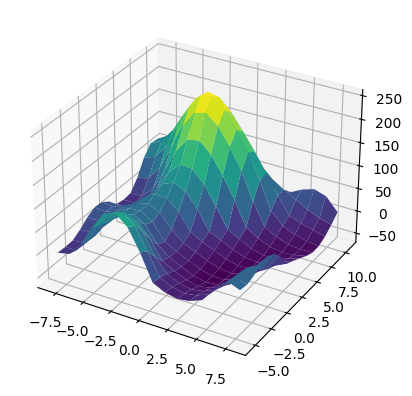

In [23]:
# Perlin Noise Terrain
plot3D_terrain(pic)

<p style="text-align:center; font-size: 20px;"><i> The more beautiful the digital appearance, the more real & true are the projected alternative worlds.</i></p>

 klick auf das Canvas (Vorsichtig die Animation kann je nach Computerleistung varieren)
 <div style="display: flex; justify-content: center;">
    <iframe src="https://gignac-cha.github.io/wave-function-collapse/" title="Wave Function Collapse" height=400 width="100%"></iframe> 
 </div>